In [2]:
#run this before, for importing libraries and mounting the drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import nibabel as nib
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**CT** (Computed Tomography) scans show a slice, or cross-section, of the body. The image shows your **bones, organs, and soft tissues** (like muscles) more clearly than standard x-rays. CT scans can show a tumor's shape, size, and location. They can even show the blood vessels that feed the tumor

*   *Tech*: 3D x-rays through the body, but radiations don't remain inside the body
*   *Detect and monitor*: body structure, internal blood vessels, fractures
*   Procedure time: 5-10mins max (so it's helpful in emergency diagnosis)
*   usually greyscale

**PET** (Positron emission tomography) scans are used to produce detailed 3D images of the inside of the body. The images can clearly show the part of the body being investigated, including any abnormal areas, and can highlight how well certain functions of the body are working.

*   *Tech*: injects a tiny amount of the radioactive tracer into a patient’s vein, usually on the inside of an elbow. After the injection, the tracer will move through the body and gather in tissues and organs. A patient will need to wait for about an hour for their body to absorb the tracer. Tracers will collect in tumors, inflamed areas or cancer cells for doctors to see.
After the tracer is absorbed, the patient will move to an exam table that slides into a scanner. The PET scanner will detect the tracer and turn the data into 3-D images on a computer monitor.
*   *Detect and monitor*: Cancer (quicklier than other tests, even in the earliest stages), Heart and Brain activities
*   *Procedure* time: 60-90mins because the body has to absorb the radioactive tracers
*   usually colorful and it should have a colorbar

Both are usually performed at an outpatient facility and do not require a hospital stay

Both can be used to detect cancer

Both are accurate, painless and noninvasive procedures

Both help eliminate the need for exploratory surgery

In [ ]:
!pip install nilearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


## dataset

In [ ]:
# saving pet and ct volumes, and the glucose uptake of each one of the 30 patients of the benign directory into a dict file;
# the dict will be converted into a dataframe later to pass them to the svm and rf previously defined function in the last healthcare project

#data_dir = '/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN'
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'

malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)

num_patients = 30
patient_count = 0

dataset = {'PET_mask_volume':[], 'CT_mask_volume':[], 'Glucose':[]}
for patient in benign:
   
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    pet_voxel_size = pet_scan.header.get_zooms()
    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    ct_voxel_size = ct_scan.header.get_zooms()
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()


    pet_mask_volume = np.sum(pet_mask_data == 1) * pet_voxel_size[0] * pet_voxel_size[1] * pet_voxel_size[2] / 1000
    ct_mask_volume = np.sum(ct_mask_data == 1) * ct_voxel_size[0] * ct_voxel_size[1] * ct_voxel_size[2] / 1000
    glucose = pet_scan_data[pet_mask_data.astype(bool)].mean()
 
 
    print(f"Patient {patient_id} pet mask volume: {pet_mask_volume:.2f} cm^3, ct mask volume: {ct_mask_volume.round(2)} cm^3, Glucose uptake: {glucose.round(2)}")
    dataset['PET_mask_volume'].append(pet_mask_volume)
    dataset['CT_mask_volume'].append(ct_mask_volume)
    dataset['Glucose'].append(glucose)

    patient_count += 1
    if patient_count == num_patients:
        break

#train and test. 3 featuresvolume, volume su pet, consumo medio glucosio. : output: no. images, labels and 3 features

Patient LCp0001 pet mask volume: 7.45 cm^3, ct mask volume: 4.26 cm^3, Glucose uptake: 3.69
Patient LCp0002 pet mask volume: 5.42 cm^3, ct mask volume: 12.01 cm^3, Glucose uptake: 3.82
Patient LCp0003 pet mask volume: 7.87 cm^3, ct mask volume: 3.37 cm^3, Glucose uptake: 1.44
Patient LCp0004 pet mask volume: 11.65 cm^3, ct mask volume: 16.12 cm^3, Glucose uptake: 1.69
Patient LCp0005 pet mask volume: 3.33 cm^3, ct mask volume: 1.55 cm^3, Glucose uptake: 0.66
Patient LCp0007 pet mask volume: 4.78 cm^3, ct mask volume: 6.98 cm^3, Glucose uptake: 9.01
Patient LCp0008 pet mask volume: 3.87 cm^3, ct mask volume: 1.58 cm^3, Glucose uptake: 1.39
Patient LCp0009 pet mask volume: 3.56 cm^3, ct mask volume: 2.37 cm^3, Glucose uptake: 2.72
Patient LCp0010 pet mask volume: 6.37 cm^3, ct mask volume: 6.17 cm^3, Glucose uptake: 5.14
Patient LCp0012 pet mask volume: 2.21 cm^3, ct mask volume: 2.79 cm^3, Glucose uptake: 4.47
Patient LCp0013 pet mask volume: 3.05 cm^3, ct mask volume: 3.1 cm^3, Glucose

In [ ]:
# the same we did two cells above, but on the malignant directory
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)

num_patients = 30
patient_count = 0

for patient in malignant:
   
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    pet_voxel_size = pet_scan.header.get_zooms()
    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    ct_voxel_size = ct_scan.header.get_zooms()
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()


    pet_mask_volume = np.sum(pet_mask_data == 1) * pet_voxel_size[0] * pet_voxel_size[1] * pet_voxel_size[2] / 1000
    ct_mask_volume = np.sum(ct_mask_data == 1) * ct_voxel_size[0] * ct_voxel_size[1] * ct_voxel_size[2] / 1000
    glucose = pet_scan_data[pet_mask_data.astype(bool)].mean()
 
 
    print(f"Patient {patient_id} pet mask volume: {pet_mask_volume:.2f} cm^3, ct mask volume: {ct_mask_volume.round(2)} cm^3, Glucose uptake: {glucose.round(2)}")
    dataset['PET_mask_volume'].append(pet_mask_volume)
    dataset['CT_mask_volume'].append(ct_mask_volume)
    dataset['Glucose'].append(glucose)

    patient_count += 1
    if patient_count == num_patients:
        break

Patient LCp0016 pet mask volume: 75.86 cm^3, ct mask volume: 31.21 cm^3, Glucose uptake: 4.44
Patient LCp0020 pet mask volume: 23.43 cm^3, ct mask volume: 8.5 cm^3, Glucose uptake: 5.69
Patient LCp0023 pet mask volume: 68.64 cm^3, ct mask volume: 67.1 cm^3, Glucose uptake: 4.5
Patient LCp0026 pet mask volume: 42.48 cm^3, ct mask volume: 39.61 cm^3, Glucose uptake: 3.6
Patient LCp0027 pet mask volume: 54.31 cm^3, ct mask volume: 151.33 cm^3, Glucose uptake: 5.24
Patient LCp0028 pet mask volume: 210.35 cm^3, ct mask volume: 156.99 cm^3, Glucose uptake: 4.24
Patient LCp0035 pet mask volume: 47.41 cm^3, ct mask volume: 73.02 cm^3, Glucose uptake: 9.53
Patient LCp0038 pet mask volume: 119.37 cm^3, ct mask volume: 481.3 cm^3, Glucose uptake: 12.37
Patient LCp0041 pet mask volume: 162.13 cm^3, ct mask volume: 125.45 cm^3, Glucose uptake: 12.88
Patient LCp0045 pet mask volume: 63.29 cm^3, ct mask volume: 42.46 cm^3, Glucose uptake: 4.91
Patient LCp0046 pet mask volume: 22.69 cm^3, ct mask volu

In [ ]:
#righe e colonna target
M = np.zeros((30, 1), dtype = np.int8)
N = np.ones((30, 1), dtype = np.int8)

dataset['y'] = M
dataset['y'] =  np.append(dataset['y'], N)

DF = pd.DataFrame(dataset)
DF

,PET_mask_volume,CT_mask_volume,Glucose,y
0,7.449557,4.264832,3.689928,0
1,5.417764,12.010729,3.823054,0
2,7.871091,3.367894,1.437953,0
3,11.653304,16.118215,1.694493,0
4,3.332436,1.546420,0.660431,0
5,4.783988,6.980281,9.007027,0
6,3.866946,1.575470,1.389443,0
7,3.557324,2.365472,2.721367,0
8,6.369087,6.172180,5.143324,0
9,2.207994,2.787223,4.469560,0


In [ ]:
df = DF.sample(frac = 1)
df.reset_index()

,index,PET_mask_volume,CT_mask_volume,Glucose,y
0,40,22.689873,11.577606,3.720814,1
1,5,4.783988,6.980281,9.007027,0
2,57,42.252070,24.291992,4.476632,1
3,6,3.866946,1.575470,1.389443,0
4,16,1.206219,1.185792,4.399799,0
5,47,40.991008,53.794618,13.328532,1
6,35,210.350480,156.993866,4.235270,1
7,33,42.479537,39.608002,3.600601,1
8,18,11.428416,39.516215,14.139402,0
9,50,60.790663,37.765503,5.740175,1


In [ ]:
# saving the file into a directory to avoid rerunning the entire code evertytime, given that it is quite slow
df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv', index = False)

### if this is not the first time you run the code, run from HERE

In [ ]:
# if this is not the first time you run the code, run from HERE
df = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv')
#df = df.drop(columns = 'Patient', axis = 1)
df

NameError: ignored

## display plots

### function plots

In [ ]:
# plotting random slices 
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def plot_random_CT_slices(directory_path):
    file_name = os.path.basename(directory_path)
    file_name = file_name.replace('_biobank', '')

    mask_ct_path = os.path.join(directory_path, f'{file_name}_CT_mask.nii')
    ct_path = os.path.join(directory_path, f'{file_name}_CT_partition.nii')
    mask_pet_path = os.path.join(directory_path, f'{file_name}_PT_mask.nii')
    pet_path = os.path.join(directory_path, f'{file_name}_PT_partition.nii')

    mask_ct = nib.load(mask_ct_path)
    ct = nib.load(ct_path)
    mask_pet = nib.load(mask_pet_path)
    pet = nib.load(pet_path)

    mask_ct_data = mask_ct.get_fdata()
    ct_data = ct.get_fdata()
    mask_pet_data = mask_pet.get_fdata()
    pet_data = pet.get_fdata()

    num_slices = ct_data.shape[2]
    slice_indices = np.random.choice(num_slices, size=4, replace=False)

    f, axarr = plt.subplots(2, 2)

    for i, ax in enumerate(axarr.flat):
        if i < len(slice_indices):
            slice_index = slice_indices[i]
            ax.imshow(np.rot90(ct_data[:, :, slice_index],k=1), cmap = 'gray')
            ax.set_title(f'Slice {slice_index+1} CT')
            #ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# plotting random slices 
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def plot_random_PT_slices(directory_path):
    file_name = os.path.basename(directory_path)
    file_name = file_name.replace('_biobank', '')

    mask_ct_path = os.path.join(directory_path, f'{file_name}_CT_mask.nii')
    ct_path = os.path.join(directory_path, f'{file_name}_CT_partition.nii')
    mask_pet_path = os.path.join(directory_path, f'{file_name}_PT_mask.nii')
    pet_path = os.path.join(directory_path, f'{file_name}_PT_partition.nii')

    mask_ct = nib.load(mask_ct_path)
    ct = nib.load(ct_path)
    mask_pet = nib.load(mask_pet_path)
    pet = nib.load(pet_path)

    mask_ct_data = mask_ct.get_fdata()
    ct_data = ct.get_fdata()
    mask_pet_data = mask_pet.get_fdata()
    pet_data = pet.get_fdata()

    num_slices = pet_data.shape[2]
    slice_indices = np.random.choice(num_slices, size=4, replace=False)

    fig, axarr = plt.subplots(2, 2, figsize=(12, 6))

    for i, ax in enumerate(axarr.flat):
        if i < len(slice_indices):
            slice_index = slice_indices[i]
            ax.imshow(np.rot90(pet_data[:, :, slice_index], k=1), cmap='hot')
            ax.set_title(f'Slice {slice_index+1} PET')
            #ax.axis('off')

    plt.tight_layout()
    plt.show()

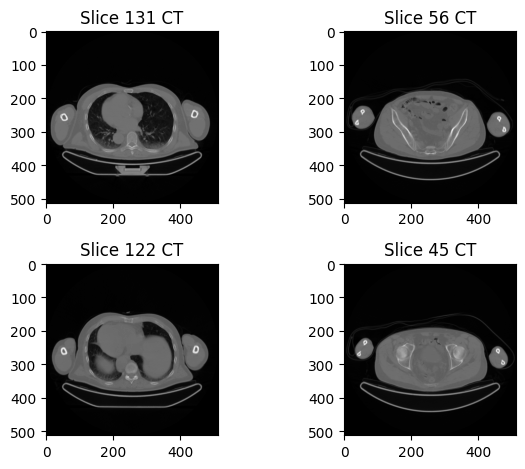

In [ ]:
plot_random_CT_slices('/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0016_biobank')

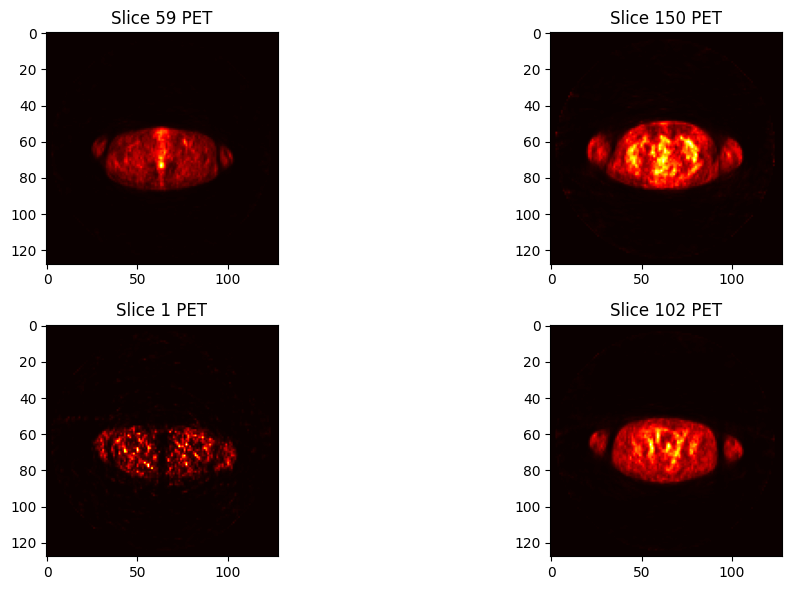

In [ ]:
plot_random_PT_slices('/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0016_biobank')

In [ ]:
test_pet_scan_path = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0020_biobank/LCp0020_PT_partition.nii'
test_pet_mask_path = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0020_biobank/LCp0020_PT_mask.nii'
test_ct_scan_path = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0020_biobank/LCp0020_CT_partition.nii'
test_ct_mask_path = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT/LCp0020_biobank/LCp0020_CT_mask.nii'

test_pet_scan = nib.load(test_pet_scan_path)
test_pet_mask = nib.load(test_pet_mask_path)
test_ct_scan = nib.load(test_ct_scan_path)
test_ct_mask = nib.load(test_ct_mask_path)

test_pet_scan_data = test_pet_scan.get_fdata()
test_pet_mask_data = test_pet_mask.get_fdata()

test_ct_scan_data = test_ct_scan.get_fdata()
test_ct_mask_data = test_ct_mask.get_fdata()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

def plot_slices_with_mask_overlay(ct_scan_data, ct_mask_data, pet_scan_data, pet_mask_data):
    display = plotting.plot_roi(ct_mask_data, bg_img=ct_scan_data, cmap='Reds', alpha=0.5, display_mode='ortho',
                                cut_coords=None, colorbar=False, title='CT Scan with Mask Overlay')
    plotting.show()

In [ ]:
def plot_PTslices_with_mask_overlay(pet_scan_data, pet_mask_data):
    display = plotting.plot_roi(pet_mask_data, bg_img=pet_scan_data, cmap=plt.cm.gist_ncar, alpha=0.1, display_mode='ortho', title='PET Scan with Mask Overlay', black_bg=False)
    display.add_overlay(pet_mask_data, cmap='jet', alpha=0.5)  # Utilizza la mappa di colori 'jet'
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn import image

def plot_mask_overlay(pet_scan_data, pet_mask_data):
    # Estrai i dati PET e la maschera
    pet_scan_data = pet_scan_data.get_fdata()
    pet_mask_data = pet_mask_data.get_fdata()

    # Allinea le dimensioni delle immagini
    if pet_scan_data.shape[:2] != pet_mask_data.shape[:2]:
        pet_scan_data = image.resample_to_img(pet_scan_data, pet_mask_data, interpolation='continuous').get_fdata()

    # Normalizza i dati PET e la maschera tra 0 e 1
    pet_scan_data = (pet_scan_data - np.min(pet_scan_data)) / (np.max(pet_scan_data) - np.min(pet_scan_data))
    pet_mask_data = pet_mask_data.astype(bool)

    # Crea l'immagine combinata
    combined_image = np.zeros_like(pet_scan_data)
    combined_image[pet_mask_data] = pet_scan_data[pet_mask_data]

    # Plotta l'immagine combinata
    plt.imshow(pet_scan_data, cmap='hot')
    plt.imshow(combined_image, cmap='hot', alpha=0.5)
    plt.colorbar()
    plt.title('PET Scan with Mask Overlay')
    plt.show()

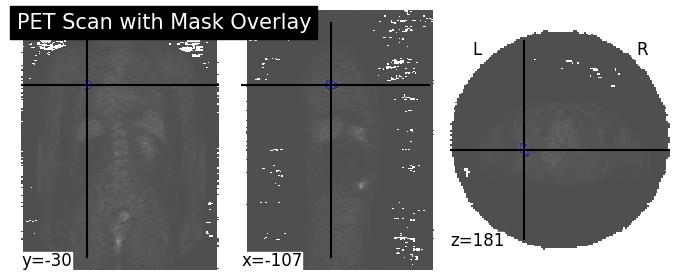

In [ ]:
plot_PTslices_with_mask_overlay(test_pet_scan, test_pet_mask)

TypeError: ignored

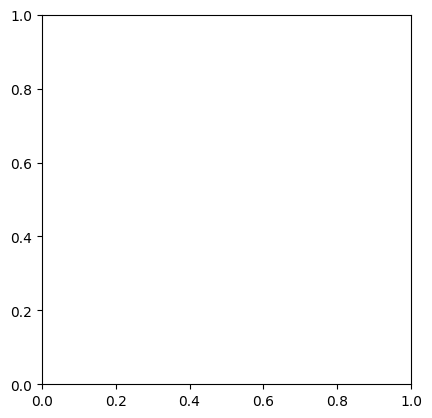

In [ ]:
plot_mask_overlay(test_pet_scan, test_pet_mask)

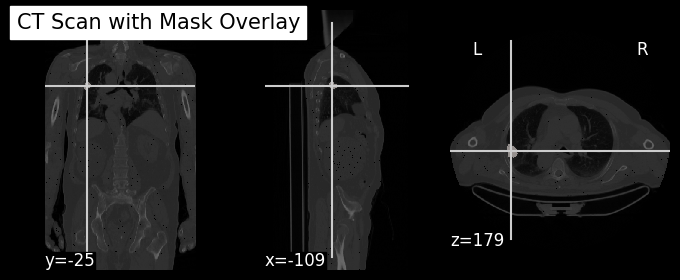

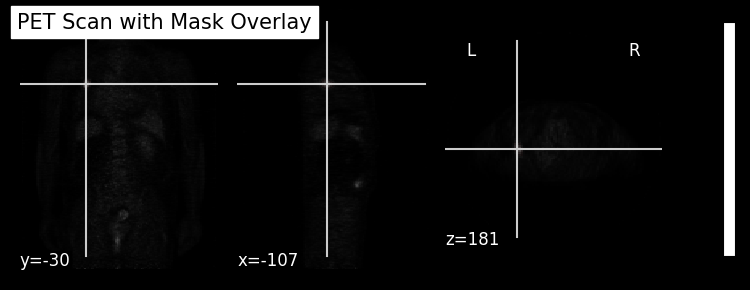

In [ ]:
plot_slices_with_mask_overlay(test_ct_scan, test_ct_mask, test_pet_scan, test_pet_mask)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

def plot_ct_pet_with_mask_overlay(ct_scan_data, ct_mask_data, pet_scan_data, pet_mask_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot CT scan with mask overlay
    axes[0].imshow(ct_scan_data, cmap='gray')
    axes[0].imshow(ct_mask_data, cmap='Reds', alpha=0.5)
    axes[0].set_title('CT Scan with Mask Overlay')
    axes[0].axis('off')

    # Plot PET scan with mask overlay
    axes[1].imshow(pet_scan_data, cmap='hot')
    axes[1].imshow(pet_mask_data, cmap='Reds', alpha=0.5)
    axes[1].set_title('PET Scan with Mask Overlay')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

TypeError: ignored

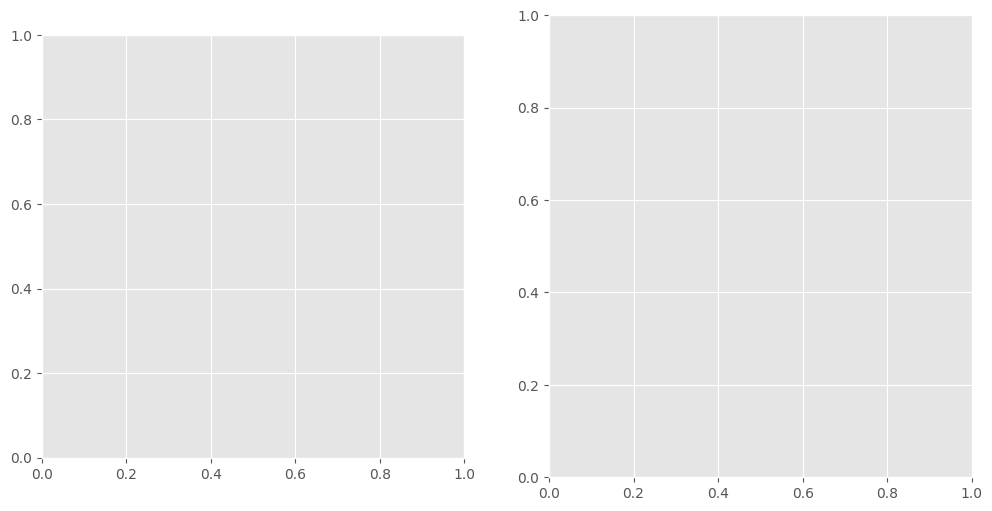

In [ ]:
plot_ct_pet_with_mask_overlay(test_ct_scan_data, test_ct_mask_data, test_pet_scan_data, test_pet_mask_data)

### other

In [ ]:
!pip install nilearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'slice 4 CT')

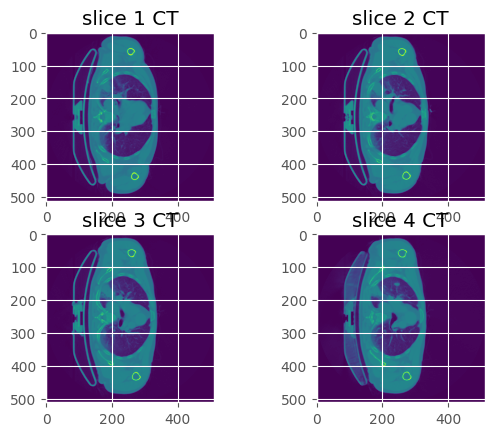

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# patient 1 malignant = LCp0016
Mask_CT_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_mask.nii')
CT_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_partition.nii')
Mask_PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_PT_mask.nii')
PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_PT_partition.nii')

# getting and plotting the slices
ct1_data = CT_1.get_fdata() #ct1_data contiene l'array con i valori di intensità dei pixel dell'immagine CT1.
mask1_data = Mask_CT_1.get_fdata()
pet1_data = PET_1.get_fdata() 
pet_mask1_data = Mask_PET_1.get_fdata()

#selezionare tutti i valori dei pixel su tutti gli assi tranne l'ultimo. 
#l'ultimo è 140, 143, 145 e 147, il che significa che le slice 140, 143, 145 e 147 vengono selezionate in ct1_data e assegnate a slice_1, slice_2, slice_3 e slice_4, rispettivamente.
slice_1_ct = ct1_data[:, :,140]
slice_2_ct = ct1_data[:, :,143]
slice_3_ct = ct1_data[:, :,145]
slice_4_ct = ct1_data[:, :,147]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(slice_1_ct)
axarr[0,0].set_title('slice 1 CT')

axarr[0,1].imshow(slice_2_ct)
axarr[0,1].set_title('slice 2 CT')

axarr[1,0].imshow(slice_3_ct)
axarr[1,0].set_title('slice 3 CT')

axarr[1,1].imshow(slice_4_ct)
axarr[1,1].set_title('slice 4 CT')

#plt.colorbar()

In [ ]:
from nilearn import datasets
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_epi, plot_roi, show
from nilearn.masking import apply_mask
%matplotlib inline
from nilearn import plotting

# masks of the 4 CT slices
mask_1a = mask1_data[:, :, 140]
mask_2a = mask1_data[:, :, 143]
mask_3a = mask1_data[:, :, 145]
mask_4a = mask1_data[:, :, 147]

#f1, axarr1 = plt.subplots(2, 2)
#axarr1[0, 0].imshow(mask_1a, cmap='gray')
#axarr1[0, 1].imshow(mask_2a, cmap='gray')
#axarr1[1, 0].imshow(mask_3a, cmap='gray')
#axarr1[1, 1].imshow(mask_4a, cmap='gray')

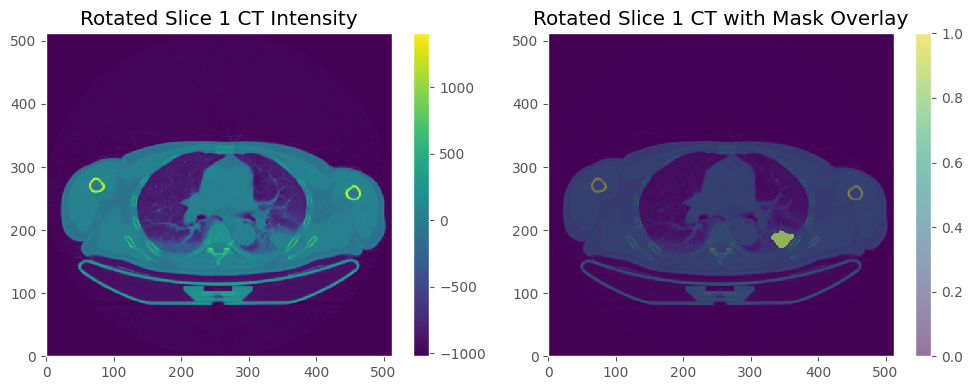

In [ ]:
import numpy as np

# Rotate slice 1 CT data 90 degrees to the left
rotated_slice_1_ct = np.rot90(slice_1_ct, k=3)

# Rotate mask overlay data (assuming it's called mask_1a) 90 degrees to the left
rotated_mask_1a = np.rot90(mask_1a, k=3)

# Show intensity of rotated slice 1 CT in a colorbar
masker = NiftiMasker()
masker.fit(CT_1)
plt.figure(figsize=(10, 4))  # Set the figure size to be taller

plt.subplot(1, 2, 1)
plt.pcolormesh(rotated_slice_1_ct)
plt.colorbar()
plt.title('Rotated Slice 1 CT Intensity')

plt.subplot(1, 2, 2)
plt.pcolormesh(rotated_slice_1_ct)
plt.pcolormesh(rotated_mask_1a, alpha=0.5)
plt.colorbar()
plt.title('Rotated Slice 1 CT with Mask Overlay')

plt.tight_layout()
plt.show()

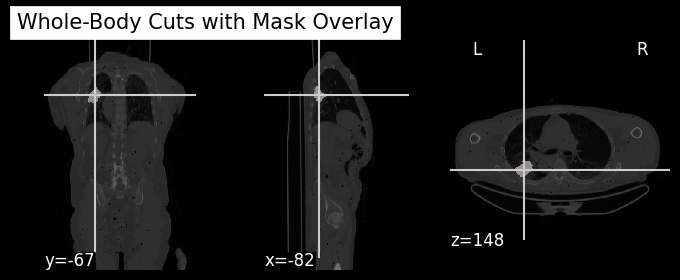

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the anatomical image and mask using nibabel of CT
anatomical_image = CT_1
mask_image = Mask_CT_1

# Plotting the whole-body figure cuts with mask overlay
display = plotting.plot_roi(mask_image, bg_img=anatomical_image, cmap='Reds', alpha=0.5, display_mode='ortho',
                            cut_coords=None, colorbar=False, title='Whole-Body Cuts with Mask Overlay')

# Display the plot
plotting.show()

### **SVM e RF Models**

In [ ]:
# if this is not the first time you run the code, run from HERE
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv')
#df = df.drop(columns = 'Patient', axis = 1)
df

,PET_mask_volume,CT_mask_volume,Glucose,y
0,22.689873,11.577606,3.720814,1
1,4.783988,6.980281,9.007027,0
2,42.252070,24.291992,4.476632,1
3,3.866946,1.575470,1.389443,0
4,1.206219,1.185792,4.399799,0
5,40.991008,53.794618,13.328532,1
6,210.350480,156.993866,4.235270,1
7,42.479537,39.608002,3.600601,1
8,11.428416,39.516215,14.139402,0
9,60.790663,37.765503,5.740175,1


In [ ]:
# standard scaling of input features
from sklearn.preprocessing import StandardScaler
X = df.drop(columns = 'y', axis = 1)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
y = df['y']

### hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, train_size=0.65, random_state=True)

In [ ]:
#svm and random forest to predict whether malignant or bening
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
import time
from scipy import stats
import random
from contextlib import redirect_stdout

plt.style.use('ggplot')
def hyperparameter_tuning(X_train, X_test, y_train, y_test):
    svm_param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10]
    }

    svm_grid_search = GridSearchCV(SVC(), svm_param_grid, scoring='accuracy')
    svm_grid_search.fit(X_train, y_train)

    rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, scoring='accuracy')
    rf_grid_search.fit(X_train, y_train)

    best_svm_model = svm_grid_search.best_estimator_
    best_svm_params = svm_grid_search.best_params_

    best_rf_model = rf_grid_search.best_estimator_
    best_rf_params = rf_grid_search.best_params_

    svm_y_pred = best_svm_model.predict(X_val)
    svm_accuracy = accuracy_score(y_val, svm_y_pred)
    svm_precision = precision_score(y_val, svm_y_pred)
    svm_recall = recall_score(y_val, svm_y_pred)
    svm_f1 = f1_score(y_val, svm_y_pred)
    svm_confusion_matrix = confusion_matrix(y_val, svm_y_pred)

    rf_y_pred = best_rf_model.predict(X_val)
    rf_accuracy = accuracy_score(y_val, rf_y_pred)
    rf_precision = precision_score(y_val, rf_y_pred)
    rf_recall = recall_score(y_val, rf_y_pred)
    rf_f1 = f1_score(y_val, rf_y_pred)
    rf_confusion_matrix = confusion_matrix(y_val, rf_y_pred)
    #svm_param_grid = {'kernel':['poly', 'rbf', 'sigmoid'], 'C':[0.1, 1, 10], 'degree':[2, 3, 4], }
    #rf_param_grid = {'n_estimators':[50, 100, 200], 'max_depth':[None, 5, 10]}
    #to be faster, use a smaller grid:
    #svm_param_grid = {'kernel': ['poly', 'rbf'], 'C': [1, 10], 'degree': [2, 3]}
    #rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}


    metrics = ['Accuracy', 'Sensitivity', 'Specificity']
    svm_scores = [svm_accuracy, svm_recall, svm_precision]
    rf_scores = [rf_accuracy, rf_recall, rf_precision]

    x = np.arange(len(metrics))
    width = 0.30

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, svm_scores, width, label='SV')
    rects2 = ax.bar(x + width/2, rf_scores, width, label='RF')

    ax.set_ylabel('Score')
    ax.set_xticks(x)
    ax.set_yticks([0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
    ax.set_xticklabels(metrics)
    ax.set_ylim([0.6, 1.0])
    ax.legend()

    fig.tight_layout()

    plt.show()

    if svm_accuracy > rf_accuracy:
        best_model_name = 'SVM'
        best_model_params = best_svm_params
    else:
        best_model_name = 'RF'
        best_model_params = best_rf_params

    return best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix


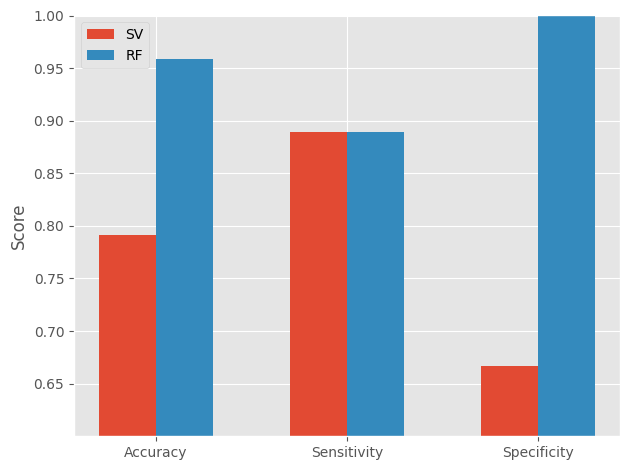

In [ ]:
best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix = hyperparameter_tuning(X_train, X_val, y_train, y_val)

In [ ]:
# the best model according to the hyperparameter tuning validation
print('Best model:', best_model_name)
print('Best model params:', best_model_params)

Best model: RF
Best model params: {'max_depth': None, 'n_estimators': 100}


### confusion matrix plot function

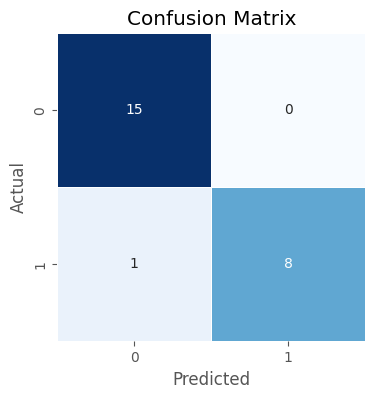

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
                square=True, linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage example
plot_confusion_matrix(rf_confusion_matrix)

In [ ]:
#training the best model svm or rf after the dim. reduction
from sklearn.model_selection import KFold
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def train_rf_with_pca(X_norm, y_train):
    pca = PCA(n_components=0.9)
    X_pca = pca.fit_transform(X_norm)    
    #svm = SVC(**dict(svm_params))
    rfc = rf(max_depth=10, n_estimators=50)  
    kfold = KFold(n_splits=5, shuffle=True, random_state=True)

    X_train, X_test = train_test_split(X_pca,train_size = 0.7, random_state=True)
    rfc.fit(X_train, y_train)

    return rfc, pca

In [ ]:
rfc, pca = train_rf_with_pca(X_norm=X_norm, y_train=y_train)

In [ ]:
from matplotlib.figure import Figure
X_test = pca.transform(X_val)
y_true = y_val
y_pred = rfc.predict(X_test)
proba = rfc.predict_proba(X_test)

#for confusion matrix
from sklearn.metrics import confusion_matrix as cm
tn, fp, fn, tp=cm(y_true,y_pred).ravel()

In [ ]:
#function that return a confusion matrix plot and a confusion matrix values in a matrix of array
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
    
def confusion_matrix_plot(y_true, y_pred, labels, model):
    tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()   
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    picture = CMD(confusion_matrix=cm, display_labels=model.classes_)
    picture.plot()
    plt.show()
    return picture, cm

In [ ]:
# patient 1 malignant = LCp0016 PET
PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_partition.nii')
Mask_PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_mask.nii')

pet_data = PET_1.get_fdata() #fdata to obtain numpy array of the image, then of the mask too
pet_mask_data = Mask_PET_1.get_fdata()

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import skimage.measure as measure

def plot_3d(image, threshold = -300): 
    p = image.transpose(2, 1, 0)
    verts, faces, normals, values = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [1, 0, 0]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

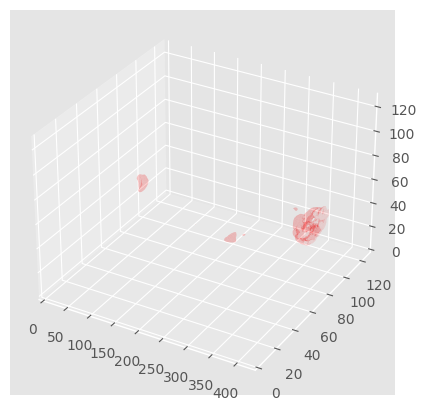

In [ ]:
# create a 3D cube with voxel values bigger than the threshold
# failing to isolate the tumoral mass
plot_3d(pet_data, threshold=5)

#RADIOMICS

**Radiomics** is the process of quantitative properties extraction (named features) from an image or from a specifed ROI (region of interest) identified in an image manually or automatically.

Feature extraction activity is typically realized by means of pattern recognition algorithms and provides, as a result, a set of numbers, each one representing a quantitative description of a specifiic either geometrical or physical property of the image portion under consideration.

Radiomics purpose in diagnosis: increasing the accuracy (benign vs malignant), enhancing the possibility of classify different malignant lesions

key steps: converting .nii images to greyscale, then you can extract the features (they're many so pick a subset) from every PET and CT scans applied to the respective mask. 

PCA to reduce dimensionality and then classification

she expects, but not mandatory: comparison between svm, rf, and the simple (1 hidden layer) NN with the same input. ROC curve suggested

first use her input features, then extract features, then (not mandatory) using the image of the tumor as deep learning approach for example with resnet.

masks as labels, predict the segments (semantic segmentation). U can use dice and unet for predicting (not using malignant/benign information if u use unet, u should use the labels as masks)

https://github.com/ovh/ai-training-examples/blob/main/notebooks/computer-vision/image-segmentation/tensorflow/brain-tumor-segmentation-unet/notebook_image_segmentation_unet.ipynb

https://keras.io/examples/vision/deeplabv3_plus/

In [ ]:
!pip install pyradiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.9 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
#import libraries for radiomics 
from __future__ import print_function
import sys
import logging
import radiomics
from radiomics import featureextractor 
from __future__ import print_function
import six # for iteratios
import os  # needed navigate the system to get the input data
from radiomics.featureextractor import RadiomicsFeatureExtractor


ImportError: ignored

In [ ]:
# loading ct and mask paths of patient 1
CT_imagepath = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_partition.nii'
CT_maskpath = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_mask.nii'

PET_imagepath='/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_partition.nii'
PET_maskpath='/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_mask.nii'

In [ ]:
!pip install --upgrade radiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for radiomics: filename=radiomics-0.1-py3-none-any.whl size=6091 sha256=3bda87483558921205fc6ccc7fbffedef8dcca4ece2dafb0683f724a9ddf334e
  Stored in directory: /root/.cache/pip/wheels/72/f5/9b/32efc9afd085f158d92202cb88e07ddd5793ea549381868b29
Successfully built radiomics


In [ ]:

extractor = featureextractor.RadiomicsFeatureExtractor()

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [ ]:
# Instantiate the extractor
extractor = RadiomicsFeatureExtractor()

#print('Extraction parameters:\n\t', extractor.settings)
#print('Enabled filters:\n\t', extractor._enabledImagetypes)
#print('Enabled features:\n\t', extractor._enabledFeatures)

NameError: ignored

In [ ]:
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'

malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)
print(malignant)

['/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0020_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0023_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0026_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0027_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0028_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0035_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0038_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0041_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0045_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0046_biobank', '/content/drive/MyDrive/Master degree AI/H

In [ ]:
import SimpleITK as sitk
import pandas as pd
import os
# Create an empty dataframe to store the pet-features
features_df = pd.DataFrame()
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]
malignant = sorted(malignant)
benign = sorted(benign)
# Loop through each patient
for patient in malignant + benign:
    patient_id = os.path.basename(patient)[:7]
    ct_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    # Perform segment-based feature extraction
    result = extractor.execute(ct_scan_path, ct_mask_path, voxelBased=False)
    # Create a dictionary to store the patient's feature values
    patient_features = {'Patient': patient}
    # Loop through the calculated features
    for key, value in six.iteritems(result):
        # Check if the key is 'diagnostics' (which contains information about the extraction settings)
        if key == 'diagnostics':
            # Extract the feature names from the 'diagnostics' dictionary
            feature_names = value['feature_names']           
            # Generate column names for the dataframe
            column_names = ['Patient'] + feature_names          
            # Set the column names for the dataframe
            if not features_df.columns.tolist():  # Check if column names are not set yet
                features_df.columns = column_names
        else:
            # Add the feature value to the patient's dictionary
            patient_features[key] = value   
    # Append the patient's feature values to the dataframe as a new row
    features_df = features_df.append(patient_features, ignore_index=True)
# Save the dataframe to a CSV file
features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT.csv', index=False)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
<ipython-input-41-6205281b528a>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(patient_features, ignore_index=True)
INFO:radiomics.featureextractor:Calculating fe

In [ ]:
m = np.zeros((30, 1), dtype = np.int8)
n = np.ones((30, 1), dtype = np.int8)
y = np.append(m, n)

In [ ]:
import SimpleITK as sitk
import pandas as pd
import os
# Create an empty dataframe to store the pet-features
pet_features_df = pd.DataFrame()
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]
malignant = sorted(malignant)
benign = sorted(benign)
# Loop through each patient
for patient in malignant + benign:
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    # Perform segment-based feature extraction
    result = extractor.execute(pet_scan_path, pet_mask_path, voxelBased=False)
    # Create a dictionary to store the patient's feature values
    patient_features = {'Patient': patient}
    # Loop through the calculated features
    for key, value in six.iteritems(result):
        # Check if the key is 'diagnostics' (which contains information about the extraction settings)
        if key == 'diagnostics':
            # Extract the feature names from the 'diagnostics' dictionary
            feature_names = value['feature_names']           
            # Generate column names for the dataframe
            column_names = ['Patient'] + feature_names          
            # Set the column names for the dataframe
            if not pet_features_df.columns.tolist():  # Check if column names are not set yet
                pet_features_df.columns = column_names
        else:
            # Add the feature value to the patient's dictionary
            patient_features[key] = value   
    # Append the patient's feature values to the dataframe as a new row
    pet_features_df = pet_features_df.append(patient_features, ignore_index=True)

# Save the dataframe to a CSV file and 
pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#all_features['target'] = y
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
<ipython-input-33-afef65a21415>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pet_features_df = pet_features_df.append(patient_features, ignore_index=True)
INFO:radiomics.featureextractor:Calcul

In [ ]:
pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#all_features['target'] = y
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

<ipython-input-29-8f13a397e708>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_features = features_df.append(pet_features_df)


In [ ]:
M = np.zeros((30, 1), dtype = np.int8)
N = np.ones((30, 1), dtype = np.int8)
y=np.append(M,N)

pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

<ipython-input-42-9920863e9a61>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_features = features_df.append(pet_features_df)


In [ ]:
all_features

,Patient,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,target
57,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7776e9a00e85fb6a57e0f9be9a078d77534f92de,3D,...,0.00011562030292519366,-3.203426503814917e-16,0.010752688172043012,0.0,0.0,1000000.0,0.0,0.0,0.0,1
6,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},aa4dd228ae570c2ac974e6213823938f0613b2d4,3D,...,1.8595099335950407e-07,-3.203426503814917e-16,0.00043122035360068997,0.0,0.0,1000000.0,0.0,0.0,0.0,0
23,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a2b91f70bafc67099c5db1bc0bfe6d5dbeba4688,3D,...,2.2343323033061413e-06,-3.203426503814917e-16,0.0014947683109118087,0.0,0.0,1000000.0,0.0,0.0,0.0,0
27,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},807de458f825c4da03df4d51918c54ab5e45bbf2,3D,...,1.8114334053680018e-06,-3.203426503814917e-16,0.0013458950201884253,0.0,0.0,1000000.0,0.0,0.0,0.0,0
2,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},6b62b03d266222127ac215a092753115a445920c,3D,...,0.3703706006987703,1.5849625007211552,0.0024855012427506215,320534.22222222225,0.0,1000000.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0311b3b9960a4577c60436ebc4b6208d0d4f2fc7,3D,...,3.2116750812553794e-06,-3.203426503814917e-16,0.0017921146953405018,0.0,0.0,1000000.0,0.0,0.0,0.0,1
10,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},40728bf46b9cb18a0abdcb621c6718ff60c35566,3D,...,0.5000031564859473,0.9999999999999993,0.005012531328320802,39402.25,0.0,1000000.0,0.0,0.0,0.0,0
32,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e3511fbfaee656fb8ad461d7066c5daf450f9bc8,3D,...,6.7465002529937596e-06,-3.203426503814917e-16,0.0025974025974025974,0.0,0.0,1000000.0,0.0,0.0,0.0,1
34,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0dcfe46e6fe8798fd170d5413bb5290ef7cddf5e,3D,...,3.7637848620572846e-05,-3.203426503814917e-16,0.006134969325153374,0.0,0.0,1000000.0,0.0,0.0,0.0,1


In [ ]:
# reading the dataframe containing the features
feat = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv')
m = np.zeros((60, 1), dtype = np.int8)
n = np.ones((60, 1), dtype = np.int8)
y = np.append(m, n)
feat['target'] = y
feat = feat.sample(frac = 1)
feat.reset_index()

,index,Patient,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,target
0,59,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},710acb743552b0ea18909f477b035e08f92babbd,...,2.558507e-07,-3.203427e-16,0.000506,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
1,95,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4c85219e37cbeaa931543c83bed181bb51be5337,...,6.666804e-01,9.182958e-01,0.018987,5338.888889,0.0,1000000.0,0.0,0.0,0.0,1
2,34,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a58688c4efec1ef59eb690a4d19ee3d2ac40152c,...,1.212909e-06,-3.203427e-16,0.001101,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
3,44,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},dc14657ba4eb93463a99dcf7ec423289cdfd1549,...,2.872738e-04,-3.203427e-16,0.016949,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
4,25,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},807de458f825c4da03df4d51918c54ab5e45bbf2,...,1.811433e-06,-3.203427e-16,0.001346,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},aa4dd228ae570c2ac974e6213823938f0613b2d4,...,1.859510e-07,-3.203427e-16,0.000431,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
116,17,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ff41c5c19976e0a0f6f26bb08f96425537f3c975,...,2.058422e-06,-3.203427e-16,0.001435,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
117,111,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},76af256e16f0d42da38a497a8f4f379044a05a11,...,3.302946e-05,-3.203427e-16,0.005747,0.000000,0.0,1000000.0,0.0,0.0,0.0,1
118,27,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8f15044df833e688c40f646930a2fe8ca08fae32,...,8.750736e-07,-3.203427e-16,0.000935,0.000000,0.0,1000000.0,0.0,0.0,0.0,0


In [ ]:
feat.shape

(120, 131)

In [ ]:
X = feat.drop('target', axis=1)
Y = feat['target']
#keeping float and integer features only
X = X.select_dtypes(include=['float', 'int'])
X

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
59,0.106134,0.0,63.352247,1977,1,0.881307,0.775721,34.530903,44.514601,49.294646,...,2.558507e-07,2.558507e-07,-3.203427e-16,0.000506,0.000000,0.0,1000000.0,0.0,0.0,0.0
95,0.099042,0.0,60.598413,158,3,0.784480,0.622433,19.107907,30.698761,29.239268,...,6.666804e-01,6.666804e-01,9.182958e-01,0.018987,5338.888889,0.0,1000000.0,0.0,0.0,0.0
34,0.143336,0.0,34.430739,908,1,0.911440,0.683786,34.040708,49.782687,52.793062,...,1.212909e-06,1.212909e-06,-3.203427e-16,0.001101,0.000000,0.0,1000000.0,0.0,0.0,0.0
44,0.126394,0.0,55.640834,59,1,0.667845,0.529054,8.811769,16.655708,12.228497,...,2.872738e-04,2.872738e-04,-3.203427e-16,0.016949,0.000000,0.0,1000000.0,0.0,0.0,0.0
25,0.166269,0.0,26.452520,743,1,0.579420,0.478858,28.986149,60.531882,44.797719,...,1.811433e-06,1.811433e-06,-3.203427e-16,0.001346,0.000000,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.111883,0.0,64.349023,2319,1,0.830679,0.697866,34.089984,48.848925,47.832027,...,1.859510e-07,1.859510e-07,-3.203427e-16,0.000431,0.000000,0.0,1000000.0,0.0,0.0,0.0
17,0.084592,0.0,31.651895,697,1,0.852398,0.699978,31.563423,45.092002,43.858902,...,2.058422e-06,2.058422e-06,-3.203427e-16,0.001435,0.000000,0.0,1000000.0,0.0,0.0,0.0
111,0.136564,0.0,54.973177,174,1,0.693676,0.585837,13.534308,23.102509,19.906550,...,3.302946e-05,3.302946e-05,-3.203427e-16,0.005747,0.000000,0.0,1000000.0,0.0,0.0,0.0
27,0.141535,0.0,35.775625,1069,1,0.898523,0.751940,38.178451,50.773242,59.359947,...,8.750736e-07,8.750736e-07,-3.203427e-16,0.000935,0.000000,0.0,1000000.0,0.0,0.0,0.0


### scaling and pca

In [3]:
import pandas as pd
radiomics_dataset = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/radiomics_dataset_num.csv')

In [4]:
from sklearn.preprocessing import MinMaxScaler
X = radiomics_dataset.drop('Label', axis=1)
y = radiomics_dataset['Label']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# 90% variance -> 7 features
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
feat4pca = pca.fit_transform(X)
feat4pca.shape

(60, 7)

In [5]:
feat4pca

array([[-1.63770622, -0.28448654,  0.50467952,  0.25210844, -0.40365999,
         0.03416164,  0.22144338],
       [-0.11539548, -1.42670659,  1.21495888,  1.12560376, -0.22921749,
        -0.70718198,  0.42210125],
       [-1.8902401 , -0.36084017,  0.2166267 ,  0.00781909, -0.44632968,
         0.53034287,  0.29866069],
       [-1.45760619,  0.13668883, -0.31895145,  0.14805535, -1.03966211,
         0.98154978,  0.23816428],
       [-2.46372418, -0.33254435,  0.74311776,  0.28511935, -0.02513608,
         0.24576149,  0.03894231],
       [-0.5296975 ,  0.15187518, -0.23987115, -0.90084005,  0.59531261,
        -0.83868748, -0.47646436],
       [-2.04549196, -0.74580744,  1.33187927,  1.14481346, -0.45756973,
        -0.14702049,  0.37460139],
       [-2.292602  , -0.27284722,  0.58459561, -0.05267248,  0.20364141,
         0.31761597, -0.03478659],
       [-2.31760392,  0.90125053, -0.21813305,  0.04424275,  0.25964241,
         0.15692021,  0.07109399],
       [-2.07968783, -0.2235

In [ ]:
# features in importance order
result = extractor.execute(CT_imagepath, CT_maskpath)
variance_ratio = pca.explained_variance_ratio_

# getting feature names
feature_names = list(result.keys())

# creating a list with features and variance
feat_variances = [(feat, var) for feat, var in zip(feature_names, pca.explained_variance_ratio_)]

# ordina la lista in ordine decrescente di varianza
feat_variances_sorted = sorted(feat_variances, key=lambda x: x[1], reverse=True)

# printa le feature e la relativa varianza in ordine di importanza
for feat, var in feat_variances_sorted:
    print(feat, var)

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feat4pca, y, test_size=0.2, random_state=42)
best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix = hyperparameter_tuning(X_train, X_test, y_train, y_test)

ValueError: ignored

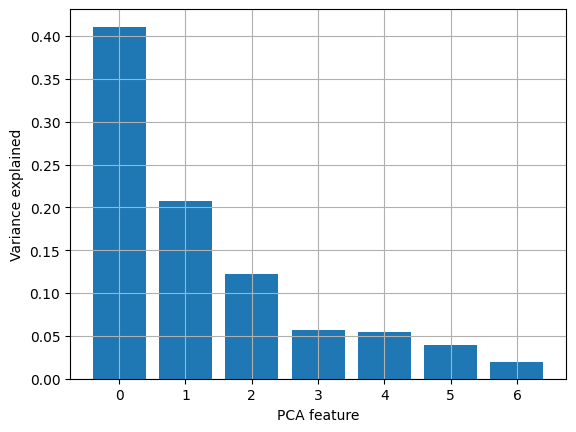

In [ ]:
#plot variances
plt.bar(range(len(variance_ratio)), variance_ratio)
plt.xlabel('PCA feature')
plt.ylabel('Variance explained')
plt.grid()
plt.show()

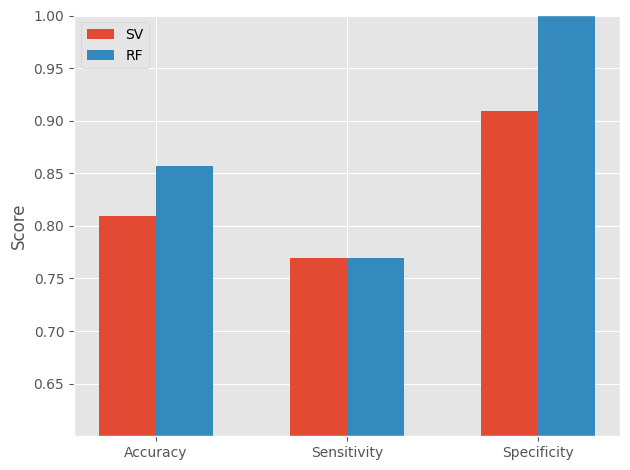

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import KFold
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# training with the best model
X_train, X_val, y_train, y_val  = train_test_split(feat4pca, y, train_size = 0.65, random_state=True)
hyperparameter_tuning(X_train, X_val, y_train, y_val) 


def train_rf(X_norm, y_train):   
    #svm = SVC(**dict(svm_params))
    rfc = rf(max_depth=10, n_estimators=50)  
    kfold = KFold(n_splits=5, shuffle=True, random_state=True)
    X_train, X_test = train_test_split(feat4pca, train_size = 0.65, random_state=True)
    rfc.fit(X_train, y_train)

    return rfc

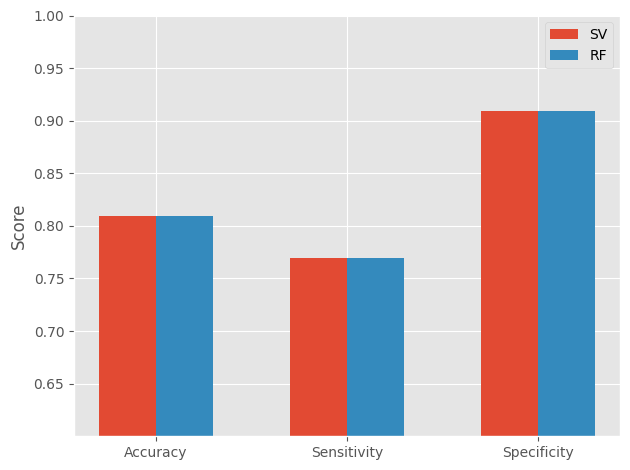

{'max_depth': None, 'n_estimators': 200}

In [ ]:
best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix = hyperparameter_tuning(X_train, X_val, y_train, y_val)

best_model_params

In [ ]:
trained_rfc=train_rf(X_train, y_train)
trained_rfc

RandomForestClassifier(max_depth=10, n_estimators=50)

In [ ]:
y_pred = trained_rfc.predict(X_val)
proba = trained_rfc.predict_proba(X_val)
confusion_matrix(y_val, y_pred)#rename thee function!!!!!!!!!!!!!!!!!!!!!

array([[ 9,  4],
       [13, 10]])

In [ ]:
rf_confusion_matrix

# Simple **Neural network**: 1 hidden layer
 
 Input: extracted features


In [ ]:
#pytorch nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def network_defiition(X_train, y_train, num_epochs=100, batch_size=32, learning_rate=0.001, hidden_size=64):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(8, activation='relu', input_dim=7))#CHANGE TO YOUR nUMBER OF FEATURES
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
# CAN change no. epochs, batch size
neural=network_defiition(X_train, y_train, num_epochs=50)
neural.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
neural.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7495 - accuracy: 0.5641
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.7464 - accuracy: 0.5641
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.7433 - accuracy: 0.5641
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7403 - accuracy: 0.5641
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.7372 - accuracy: 0.5641
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.7342 - accuracy: 0.5641
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 0.7313 - accuracy: 0.5641
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.7283 - accuracy: 0.5641
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 0.7255 - accuracy: 0.5641
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 0.7226 - accuracy: 0.5641
Epoch 11/50
1/1 [==============

In [ ]:
neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


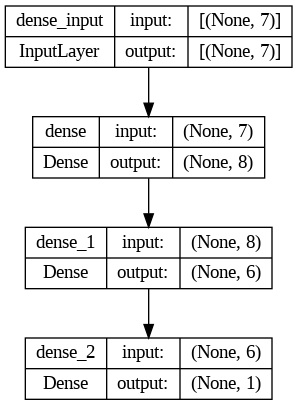

In [ ]:
from keras.utils import plot_model
plot_model(neural, to_file='/tmp/model.png', show_shapes=True)

In [ ]:
y_pred = neural.predict(X_val)

1/1 [==============================] - 0s 62ms/step


In [ ]:
#accuracy model 
score = neural.evaluate(X_val, y_val,verbose=1)
print(score)

1/1 [==============================] - 0s 137ms/step - loss: 0.6398 - accuracy: 0.6190
[0.6398352384567261, 0.6190476417541504]


In [ ]:
from sklearn.metrics import auc, roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

AUC is the percentage of this area that is under this ROC (Receiver operating characteristic) curve, ranging between 0~1.  

What can they do?

ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance by assessing the ranking regarding separation of the two classes. The higher, the better.

comparison with the best model (rfc or svc) previously run

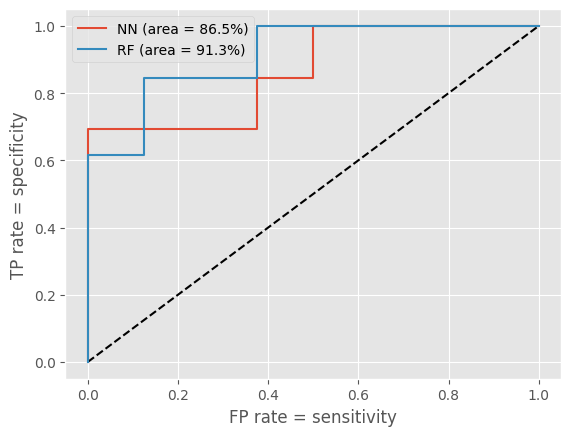

In [ ]:
#def plot_roc_NNrf():
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='NN (area = {:.1f}%)'.format(auc_keras*100))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.1f}%)'.format(auc_rf*100))
plt.xlabel('FP rate = sensitivity')
plt.ylabel('TP rate = specificity')
plt.legend(loc='best')
plt.show()

# segmentation cnn
https://colab.research.google.com/github/usuyama/pytorch-unet/blob/master/pytorch_unet_resnet18_colab.ipynb#scrollTo=bY0Vk2VDCAiz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/lungs_masses.csv')

In [7]:
import os

benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS1_MALIGNANT'

directories = [benign_dir, malign_dir]
file_paths = []

for directory in directories:
    patients = [f.path for f in os.scandir(directory) if f.is_dir()]
    patients = sorted(patients)

    for patient in patients:
        patient_id = os.path.basename(patient)[:7]
        pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
        pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
        ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
        ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

        file_paths.append([pet_scan_path, pet_mask_path, ct_scan_path, ct_mask_path])

for sub_list in file_paths:
    print(sub_list)

['/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_PT_partition.nii', '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_PT_mask.nii', '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_CT_partition.nii', '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_CT_mask.nii']
['/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0002_biobank/LCp0002_PT_partition.nii', '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0002_biobank/LCp

In [8]:
partitions_files = [y[2] for y in file_paths]
mask_files = [y[3] for y in file_paths]

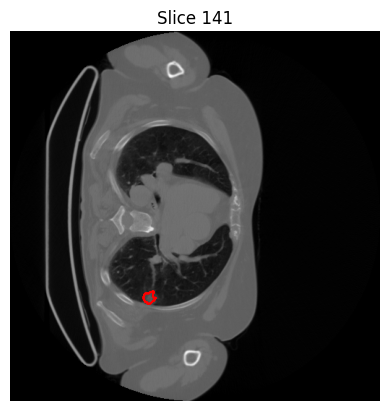

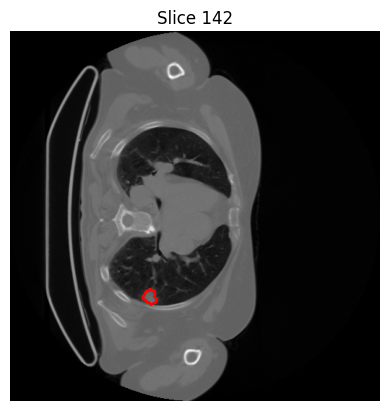

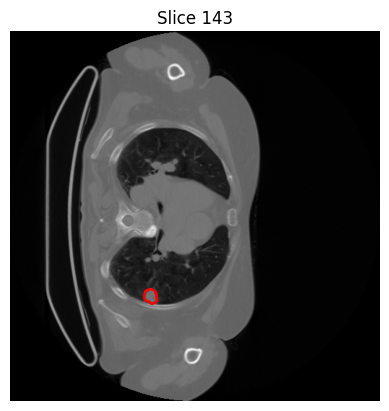

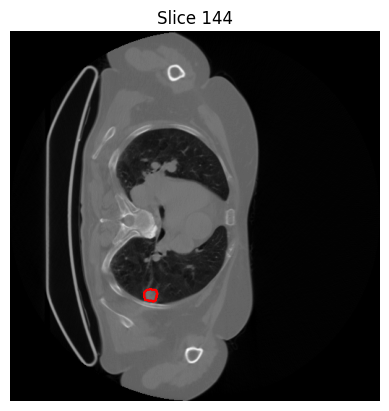

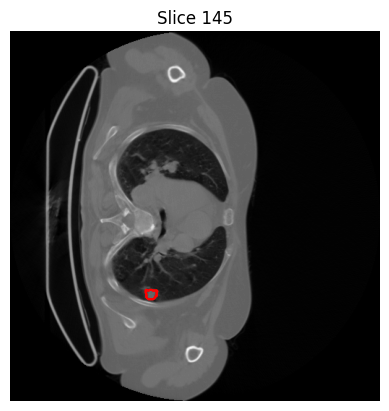

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

mask_file = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_CT_mask.nii'
partition_file = '/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/LCp0001_biobank/LCp0001_CT_partition.nii'

mask_data = nib.load(mask_file).get_fdata()
partition_data = nib.load(partition_file).get_fdata()

slices_with_mass = np.unique(np.where(mask_data > 0)[2])

for slice_idx in slices_with_mass:
    plt.figure()
    plt.imshow(partition_data[:, :, slice_idx], cmap='gray')
    plt.contour(mask_data[:, :, slice_idx], colors='r', linewidths=1)
    plt.title(f"Slice {slice_idx + 1}")
    plt.axis('off')
    plt.show()

In [10]:
!pip install --upgrade nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [15]:
import torch
from torch.utils.data import Dataset
import nibabel as nib
import numpy as np
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, ct_paths, mask_paths, transform=None):
        self.ct_paths = ct_paths
        self.mask_paths = mask_paths
        self.transform = transform
        self.mass_slices = self.find_mass_slices()

    def __len__(self):
        return len(self.mass_slices)

    def __getitem__(self, idx):
        file_idx, slice_idx = self.mass_slices[idx]
        ct_path = self.ct_paths[file_idx]
        mask_path = self.mask_paths[file_idx]

        ct_scan = nib.load(ct_path)
        mask = nib.load(mask_path)

        ct_scan_data = ct_scan.get_fdata()
        mask_data = mask.get_fdata()

        ct_slice = ct_scan_data[:, :, slice_idx]
        mask_slice = mask_data[:, :, slice_idx]

        # Convert the CT slice to 3 channels
        ct_slice = np.stack([ct_slice] * 3, axis=0)  # Transpose dimensions to [channels, height, width]

        ct_slice = ct_slice.astype(np.float32)
        mask_slice = mask_slice.astype(np.float32)

        ct_slice_pil = Image.fromarray(ct_slice)

        # Resize CT slice to 32x32
        resize = transforms.Resize((32, 32))
        ct_slice_resized = resize(ct_slice_pil)

        # Convert resized CT slice back to NumPy array
        ct_slice_resized = np.array(ct_slice_resized)

        if self.transform:
            ct_slice = self.transform(ct_slice)

        mask_slice = (mask_slice > 0).astype(np.float32)

        return ct_slice, mask_slice

    def find_mass_slices(self):
        mass_slices = []
        for i, mask_path in enumerate(self.mask_paths):
            mask = nib.load(mask_path)
            mask_data = mask.get_fdata()

            current_mass_slices = np.where(mask_data > 0)[2]
            mass_slices.extend([(i, slice_idx) for slice_idx in current_mass_slices])

        return mass_slices

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models

train_ct_scans = partitions_files[10:]
train_masks = mask_files[10:]

val_ct_scans = partitions_files[:10]
val_masks = mask_files[:10]

num_classes = 2

model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.classifier[-1] = nn.Conv2d(model.classifier[-1].in_channels, num_classes, kernel_size=1)

criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

train_dataset = CustomDataset(train_ct_scans, train_masks)
val_dataset = CustomDataset(val_ct_scans, val_masks)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()
num_epochs = 1

for epoch in range(num_epochs):
    running_loss = 0.0

    for inputs, masks in train_loader:
        inputs = inputs.to(device)
        masks = masks.unsqueeze(1).to(device)

        outputs = model(inputs)["out"]
        loss = criterion(outputs, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for val_inputs, val_masks in val_loader:
            val_inputs = val_inputs.to(device)
            val_masks = val_masks.to(device)

            val_outputs = model(val_inputs)["out"]
            val_loss += criterion(val_outputs, val_masks).item()

    print(f"Validation Loss: {val_loss / len(val_loader)}")

TypeError: ignored

### trying this

In [ ]:
import os
from sklearn.model_selection import train_test_split
# Specify the path of the dataset directory
data_path = "/content/drive/MyDrive/Master degree AI/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio"

# Retrieve all samples from the malignant folder
samples_malignant = os.listdir(os.path.join(data_path, "CLASS1_MALIGNANT"))

# Retrieve all samples from the benign folder
samples_benign = os.listdir(os.path.join(data_path, "CLASS2_BENIGN"))

# Split the dataset into train and validation sets
samples_train_malignant, samples_val_malignant = train_test_split(samples_malignant, test_size=0.2, random_state=42)
samples_train_benign, samples_val_benign = train_test_split(samples_benign, test_size=0.2, random_state=42)

# Split the train set into the real train set and a test set
samples_train_malignant, samples_test_malignant = train_test_split(samples_train_malignant, test_size=0.15, random_state=42)
samples_train_benign, samples_test_benign = train_test_split(samples_train_benign, test_size=0.15, random_state=42)

# Combine the malignant and benign samples for the train, validation, and test sets
samples_train = [('CLASS1_MALIGNANT', sample) for sample in samples_train_malignant] + [('CLASS2_BENIGN', sample) for sample in samples_train_benign]
samples_val = [('CLASS1_MALIGNANT', sample) for sample in samples_val_malignant] + [('CLASS2_BENIGN', sample) for sample in samples_val_benign]
samples_test = [('CLASS1_MALIGNANT', sample) for sample in samples_test_malignant] + [('CLASS2_BENIGN', sample) for sample in samples_test_benign]

# Print data distribution
print(f"Train length: {len(samples_train)}")
print(f"Validation length: {len(samples_val)}")
print(f"Test length: {len(samples_test)}")

Train length: 40
Validation length: 12
Test length: 8


In [ ]:
from tensorflow import keras 
import numpy as np
import cv2

IMG_SIZE = 32 #suggested to use 64X64, cropping on the ROI
VOLUME_START_AT = 120
VOLUME_SLICES = 60
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE, IMG_SIZE), batch_size=2, n_channels=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y




    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples'
        X = np.zeros((self.batch_size * VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size * VOLUME_SLICES, *self.dim))

        for c, (class_name, i) in enumerate(Batch_ids):
            sample_path = os.path.join(data_path, class_name, i)
            CT_mask_path = os.path.join(sample_path, 'LCp' + i[3:].replace('_biobank', '') + '_CT_mask.nii')
            CT_partition_path = os.path.join(sample_path, 'LCp' + i[3:].replace('_biobank', '') + '_CT_partition.nii')
            PT_partition_path = os.path.join(sample_path, 'LCp' + i[3:].replace('_biobank', '') + '_PT_partition.nii')
            PT_mask_path = os.path.join(sample_path, 'LCp' + i[3:].replace('_biobank', '') + '_PT_mask.nii')

            CT_mask = nib.load(CT_mask_path).get_fdata()
            CT_partition = nib.load(CT_partition_path).get_fdata()
            PT_partition = nib.load(PT_partition_path).get_fdata()
            PT_mask = nib.load(PT_mask_path).get_fdata()

            for j in range(VOLUME_SLICES):
                X[j + VOLUME_SLICES * c, :, :, 0] = cv2.resize(CT_partition[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                X[j + VOLUME_SLICES * c, :, :, 1] = cv2.resize(PT_partition[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

                # Resize the CT_mask to match the desired shape
                y[j + VOLUME_SLICES * c] = cv2.resize(CT_mask[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

        y[y == 4] = 3
        mask = tf.one_hot(y, 4)
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))

        return X / np.max(X), Y

training_generator = DataGenerator(samples_train)
valid_generator = DataGenerator(samples_val)
test_generator = DataGenerator(samples_test)


In [ ]:
# U-Net implementation for BraTS 2019 by Naomi Fridman, https://naomi-fridman.medium.com/multi-class-image-segmentation-a5cc671e647a
def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    conv10 = Conv2D(2, 1, activation = 'softmax')(conv)
    
    return Model(inputs = inputs, outputs = conv10)

In [ ]:
import tensorflow.keras.backend as K

# Loss function
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 2
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:, :, :, i])
        y_pred_f = K.flatten(y_pred[:, :, :, i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

# Evaluation metrics
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import rotate
from skimage.util import montage
import keras
import cv2
import tensorflow
import random
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import numpy as np
from keras.callbacks import CSVLogger
import keras.backend as K
import zipfile

# Define input data shape
input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

# Build and compile the model
model = build_unet(input_layer, 'he_normal', 0.2)

model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy', tensorflow.keras.metrics.MeanIoU(num_classes=2), dice_coef, precision, sensitivity, specificity] )

In [ ]:
# Set up callbacks
callbacks = [
    tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001, verbose=1),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='model_.{epoch:02d}-{val_loss:.6f}.m5', verbose=1, save_best_only=True, save_weights_only=True),
    tensorflow.keras.callbacks.CSVLogger('training.log', separator=',', append=False)
]


In [ ]:
import tensorflow as tf

model.fit(training_generator,
          epochs=1,
          steps_per_epoch=len(samples_train),
          callbacks=callbacks,
          validation_data=valid_generator)

InvalidArgumentError: ignored

# tkinter GUI

In [ ]:
pip install customtkinter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 6.4 MB/s eta 0:00:00


In [ ]:
import tkinter as tk
from tkinter import Tk, Frame
from tkinter import filedialog, Label
from tkinter import ttk
from tkinter import Canvas
from tkinter.ttk import Style#, Button
from tkinter import Button
from tkinter import messagebox
import customtkinter as ct
import csv
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from threading import Thread
from queue import Queue
from PIL import ImageTk, Image
from io import StringIO
import sys

In [ ]:
# import 1 patient da GUI as a directory with his 4 .nii file

def open_inf():
    os.startfile('informatio-gui.pdf')

import tkinter as tk
from tkinter import filedialog

def upload_directory():
    root = tk.Tk()
    root.withdraw()

    # Open a file dialog to select a directory
    directory_path = filedialog.askdirectory()

    # Process the selected directory
    if directory_path:
        # Do something with the selected directory
        print("Selected directory:", directory_path)
    else:
        print("No directory selected.")


# gui run

In [ ]:
root = ct.CTk()
root.title("LungWatch")
#root.configure(bg="#ADD8E6")
#my_image=ct.CTkImage(dark_image=Image.open("Enhance.png"),size=(10,10))
#button_img=ct.CTkButton(root, image=my_image)
#ct.set_default_color_theme("blue")
frame=tk.Frame(root)
frame.pack(anchor="nw")

aiuto = tk.Button(frame, bitmap="info", command=open_inf)
aiuto.pack(side=tk.LEFT)

title_label = ct.CTkLabel(root, text="LungWatch", font=("Helvetica", 64))
title_label.pack(pady=30)

import_patient = ct.CTkButton(root, text="Import dataset", command=upload_directory)
import_patient.pack(pady=10)

dataset_label = ct.CTkLabel(root, text="")
dataset_label.pack()

root.mainloop()

TclError: ignored